<a href="https://colab.research.google.com/github/alaa-alt/ML1_FinalProject/blob/main/ML1_Final_Project_Alaa_Abdelmonsef_Elkaffas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Gesture Classification Using MediaPipe Landmarks from the HaGRID Dataset


---



## 1. Importing necessary libraries

In [ ]:
!pip install mediapipe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import joblib
from sklearn.metrics import confusion_matrix
import cv2
from sklearn.metrics import accuracy_score
import json
from collections import Counter

## 2. Data loading

In [ ]:
url = "https://media.githubusercontent.com/media/alaa-alt/ML1_FinalProject/refs/heads/main/hand_landmarks_data.csv"
df = pd.read_csv(url)
df.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [ ]:
df.columns

Index(['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4',
       'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8',
       'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11', 'z11', 'x12',
       'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14', 'x15', 'y15',
       'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18', 'y18', 'z18',
       'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'x21', 'y21', 'z21', 'label'],
      dtype='object')

## 3. Data Visualization

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.dtypes

x1       float64
y1       float64
z1       float64
x2       float64
y2       float64
          ...   
z20      float64
x21      float64
y21      float64
z21      float64
label     object
Length: 64, dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

### a. Showing landmarks connections from mediapipe

In [ ]:
mp_hands = mp.solutions.hands
connections = list(mp_hands.HAND_CONNECTIONS)

### b. Choosing random samples to show

In [ ]:
num_samples = 5
samples = df.sample(n=num_samples, random_state=42)

### c. Landmarks of hand and plotting them

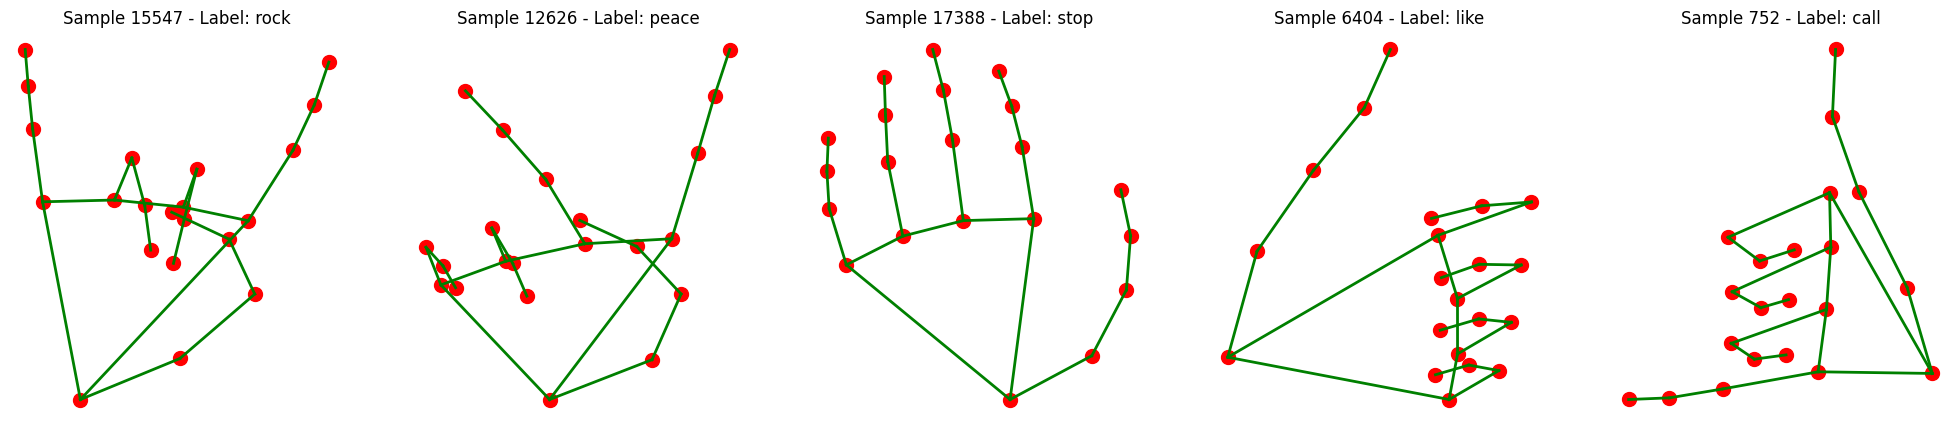

In [ ]:
fig, axes = plt.subplots(1, num_samples, figsize=(5 * num_samples, 5))
if num_samples == 1:
    axes = [axes]

for i, (index, row) in enumerate(samples.iterrows()):
    landmarks_x = [row[f"x{j}"] for j in range(1, 22)]
    landmarks_y = [row[f"y{j}"] for j in range(1, 22)]

    # Plot MediaPipe connections
    for connection in connections:
        x_values = [landmarks_x[connection[0]], landmarks_x[connection[1]]]
        y_values = [landmarks_y[connection[0]], landmarks_y[connection[1]]]
        axes[i].plot(x_values, y_values, 'g-', linewidth=2)

    # Plot keypoints
    axes[i].scatter(landmarks_x, landmarks_y, c='red', s=100)
    axes[i].invert_yaxis()
    axes[i].set_title(f"Sample {index} - Label: {row['label']}")
    axes[i].axis("off")

plt.show()

## 4. Hand landmark normalization

In [ ]:
def normalize_landmarks(df):
    df = df.copy()  # Copy to avoid modifying original data

    ### Wrist coordinates
    x_wrist, y_wrist = df["x1"], df["y1"]

    ### Middle finger tip coordinates
    x_tip, y_tip = df["x13"], df["y13"]

    ### Compute scale factor
    scale = np.sqrt((x_tip - x_wrist) ** 2 + (y_tip - y_wrist) ** 2)
    scale = np.maximum(scale, 1e-6)

    ### Normalize all x, y coordinates
    for j in range(1, 22):
        df[f"x{j}"] = (df[f"x{j}"] - x_wrist) / scale
        df[f"y{j}"] = (df[f"y{j}"] - y_wrist) / scale

    return df

# Apply the function
df = normalize_landmarks(df)


In [ ]:
df.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


## 5. Label encoding the label column

In [ ]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
label_mapping = {label: idx for idx, label in enumerate(encoder.classes_)}
label_mapping = {str(key): value for key, value in label_mapping.items()}
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)
print(label_mapping)

{'call': 0, 'dislike': 1, 'fist': 2, 'four': 3, 'like': 4, 'mute': 5, 'ok': 6, 'one': 7, 'palm': 8, 'peace': 9, 'peace_inverted': 10, 'rock': 11, 'stop': 12, 'stop_inverted': 13, 'three': 14, 'three2': 15, 'two_up': 16, 'two_up_inverted': 17}


In [ ]:
encoder.inverse_transform(df['label'].unique())

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

## 6. Splitting the data

In [ ]:
features = df.drop('label', axis=1)
labels = df['label']

In [ ]:
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [ ]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

15405
5135
5135
15405
5135
5135


## 7. Training different models on the dataset and evaluating the models
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier

In [ ]:
lr_model = LogisticRegression().fit(features_train, labels_train)

c:\Users\alaa6\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt_model = DecisionTreeClassifier().fit(features_train, labels_train)

In [ ]:
svm_model = SVC().fit(features_train, labels_train)

In [ ]:
rf_model = RandomForestClassifier().fit(features_train, labels_train)

In [ ]:
gb_model = GradientBoostingClassifier().fit(features_train, labels_train)

In [ ]:
ab_model = AdaBoostClassifier().fit(features_train, labels_train)

c:\Users\alaa6\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Accuracy:

In [ ]:
print("===========Accuracy Scores of the models===========")
print("Logistic regression:", lr_model.score(features_validation, labels_validation))
print("Decision tree:", dt_model.score(features_validation, labels_validation))
print("SVM:", svm_model.score(features_validation, labels_validation))
print("Random forest:", rf_model.score(features_validation, labels_validation))
print("Gradient boosting:", gb_model.score(features_validation, labels_validation))
print("AdaBoost:", ab_model.score(features_validation, labels_validation))

===========Accuracy Scores of the models===========
Logistic regression: 0.8385589094449853
Decision tree: 0.9466407010710808
SVM: 0.9180136319376826
Random forest: 0.9776046738072055
Gradient boosting: 0.9748782862706913
AdaBoost: 0.1851996105160662


- As we can see, random forest gives the best accuracy score

### F1-Score

In [ ]:
print("===========F1-scores of the models:===========")
lr_predicted_labels = lr_model.predict(features_validation)
print("Logistic regression:", f1_score(labels_validation, lr_predicted_labels, average='weighted'))
dt_predicted_labels = dt_model.predict(features_validation)
print("Decision tree:", f1_score(labels_validation, dt_predicted_labels, average='weighted'))
svm_predicted_labels = svm_model.predict(features_validation)
print("SVM:", f1_score(labels_validation, svm_predicted_labels, average='weighted'))
rf_predicted_labels = rf_model.predict(features_validation)
print("Random forest:", f1_score(labels_validation, rf_predicted_labels, average='weighted'))
gb_predicted_labels = gb_model.predict(features_validation)
print("Gradient boosting:", f1_score(labels_validation, gb_predicted_labels, average='weighted'))
ab_predicted_labels = ab_model.predict(features_validation)
print("AdaBoost:", f1_score(labels_validation, ab_predicted_labels, average='weighted'))

===========F1-scores of the models:===========
Logistic regression: 0.836106372257509
Decision tree: 0.9467332334302095
SVM: 0.917688345846663
Random forest: 0.9775924165262385
Gradient boosting: 0.9748766463317793
AdaBoost: 0.09973064215297643


- As we can see, the best F1-score is the random forest.

### Precision

In [ ]:
print("=========== Precision Scores of the Models ===========")
print("Logistic regression:", precision_score(labels_validation, lr_model.predict(features_validation), average='weighted'))
print("Decision tree:", precision_score(labels_validation, dt_model.predict(features_validation), average='weighted'))
print("SVM:", precision_score(labels_validation, svm_model.predict(features_validation), average='weighted'))
print("Random forest:", precision_score(labels_validation, rf_model.predict(features_validation), average='weighted'))
print("Gradient boosting:", precision_score(labels_validation, gb_model.predict(features_validation), average='weighted'))
print("AdaBoost:", precision_score(labels_validation, ab_model.predict(features_validation), average='weighted'))

=========== Precision Scores of the Models ===========
Logistic regression: 0.8396808319136294
Decision tree: 0.9469992306274323
SVM: 0.9196804261446018
Random forest: 0.9777001714368722
Gradient boosting: 0.9749947424235794
AdaBoost: 0.16814144030120964


c:\Users\alaa6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- As seen above, the best precision is also for the random forest

### Recall

In [ ]:
print("=========== Recall Scores of the Models ===========")
print("Logistic regression:", recall_score(labels_validation, lr_model.predict(features_validation), average='weighted'))
print("Decision tree:", recall_score(labels_validation, dt_model.predict(features_validation), average='weighted'))
print("SVM:", recall_score(labels_validation, svm_model.predict(features_validation), average='weighted'))
print("Random forest:", recall_score(labels_validation, rf_model.predict(features_validation), average='weighted'))
print("Gradient boosting:", recall_score(labels_validation, gb_model.predict(features_validation), average='weighted'))
print("AdaBoost:", recall_score(labels_validation, ab_model.predict(features_validation), average='weighted'))

=========== Recall Scores of the Models ===========
Logistic regression: 0.8385589094449853
Decision tree: 0.9466407010710808
SVM: 0.9180136319376826
Random forest: 0.9776046738072055
Gradient boosting: 0.9748782862706913
AdaBoost: 0.1851996105160662


- Finally, the best recall score is for the random forest
- Therefore, the chosen model to work with will be ***Random Forest***

### To compare all results, below we will find all the metrics for the models to ensure we used the best performing model.

In [ ]:
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "AdaBoost": ab_model
}

results = []

for name, model in models.items():
    preds = model.predict(features_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(labels_test, preds),
        "Precision": precision_score(labels_test, preds, average='weighted'),
        "Recall": recall_score(labels_test, preds, average='weighted'),
        "F1-Score": f1_score(labels_test, preds, average='weighted')
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.829990   0.830450  0.829990  0.827969
1        Decision Tree  0.944888   0.945246  0.944888  0.944951
2                  SVM  0.919377   0.921013  0.919377  0.919604
3        Random Forest  0.973515   0.973624  0.973515  0.973514
4    Gradient Boosting  0.969426   0.969598  0.969426  0.969456
5             AdaBoost  0.181305   0.161359  0.181305  0.093284


c:\Users\alaa6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Bar chart comparing the models based on the accuracy and F1-Score

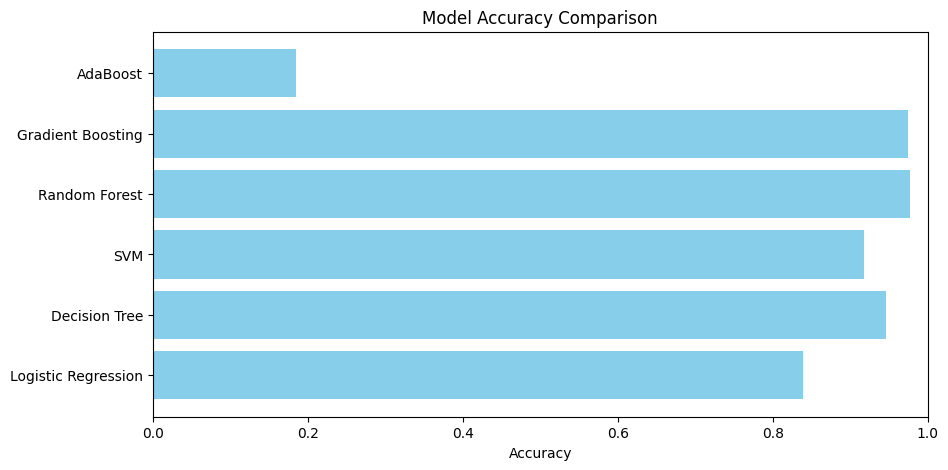

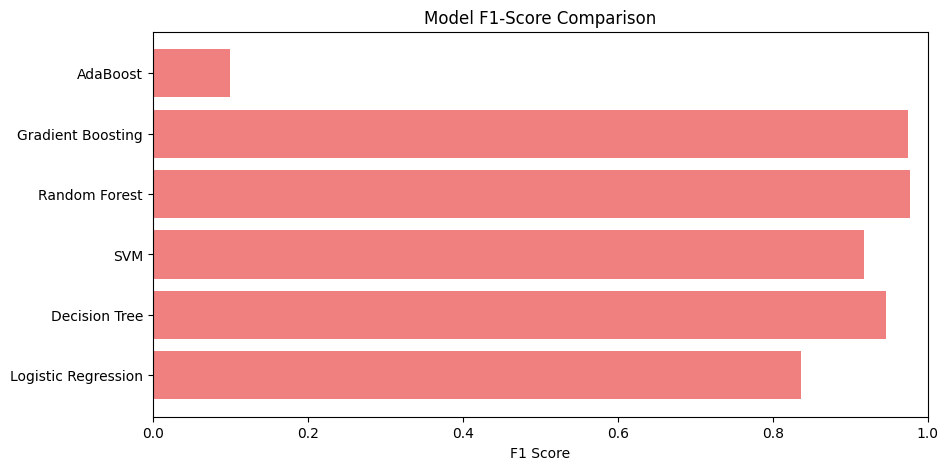

In [ ]:
model_names = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest", "Gradient Boosting", "AdaBoost"]
accuracy_scores = [
    lr_model.score(features_validation, labels_validation),
    dt_model.score(features_validation, labels_validation),
    svm_model.score(features_validation, labels_validation),
    rf_model.score(features_validation, labels_validation),
    gb_model.score(features_validation, labels_validation),
    ab_model.score(features_validation, labels_validation)
]
f1_scores = [
    f1_score(labels_validation, lr_model.predict(features_validation), average='weighted'),
    f1_score(labels_validation, dt_model.predict(features_validation), average='weighted'),
    f1_score(labels_validation, svm_model.predict(features_validation), average='weighted'),
    f1_score(labels_validation, rf_model.predict(features_validation), average='weighted'),
    f1_score(labels_validation, gb_model.predict(features_validation), average='weighted'),
    f1_score(labels_validation, ab_model.predict(features_validation), average='weighted')
]
plt.figure(figsize=(10, 5))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()
plt.figure(figsize=(10, 5))
plt.barh(model_names, f1_scores, color='lightcoral')
plt.xlabel("F1 Score")
plt.title("Model F1-Score Comparison")
plt.xlim(0, 1)
plt.show()

### Confusion Matrix

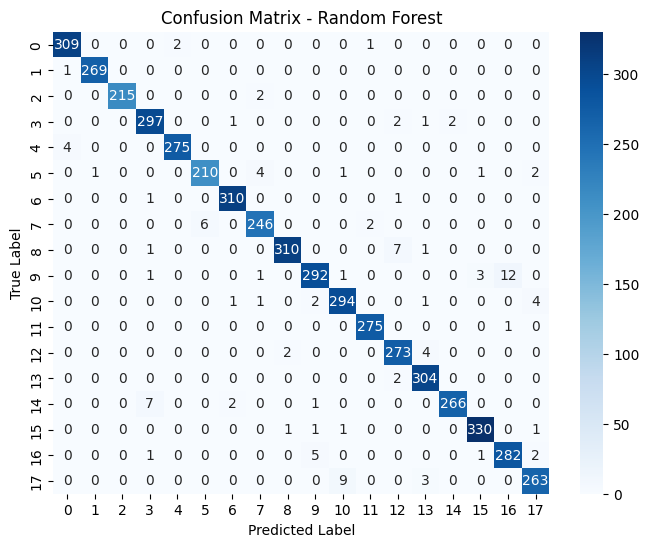

In [ ]:
y_pred = rf_model.predict(features_validation)
cm = confusion_matrix(labels_validation, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels_validation), yticklabels=np.unique(labels_validation))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Now, let's test on the testing data!


In [ ]:
print("Accuracy of random forest on the testing data:", rf_model.score(features_test, labels_test))
rf_testing_labels = rf_model.predict(features_test)
print("F1-score of random forest on the testing data:", f1_score(labels_test, rf_testing_labels, average='weighted'))
print("Precision of random forest on the testing data:", precision_score(labels_test, rf_testing_labels, average='weighted'))
print("Recall of random forest on the testing data:", recall_score(labels_test, rf_testing_labels, average='weighted'))

Accuracy of random forest on the testing data: 0.9735150925024343
F1-score of random forest on the testing data: 0.9735138741807284
Precision of random forest on the testing data: 0.9736238347513142
Recall of random forest on the testing data: 0.9735150925024343


## 8. Save the model

In [ ]:
joblib.dump(rf_model, "RF_model.pkl")

['RF_model.pkl']

In [ ]:
original_columns=features.columns

## 9. Using MediaPipe to extract hand landmarks from livestream and predict gestures.

In [ ]:
# Initialize mediapipe hands module
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Set up the webcam capture
cap = cv2.VideoCapture(1)
model = joblib.load('RF_model.pkl')
# Load the label mapping from the saved JSON file
with open('label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

def normalize_landmarks(landmark):
    # Wrist coordinates
    x_wrist, y_wrist = landmark[0][0], landmark[0][1]

    # Middle finger tip coordinates
    x_tip, y_tip = landmark[12][0], landmark[12][1]

    # Compute scale factor
    scale = np.sqrt((x_tip - x_wrist) ** 2 + (y_tip - y_wrist) ** 2)
    if scale == 0:
        scale = 1
    # Normalize all x, y coordinates
    normalized_landmarks = [((x - x_wrist)/scale, (y - y_wrist)/scale, z) for x, y, z in landmark]
    return normalized_landmarks

# Initialize hands detection
with mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5) as hands:
    predictions = []
    window_size = 7
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(rgb_frame)

        # If hands are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on the frame
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                #Extract landmarks from hand
                landmarks = [(landmark.x, landmark.y, landmark.z) for landmark in hand_landmarks.landmark]
                normalized_landmarks = normalize_landmarks(landmarks)
                flattened_landmarks = np.array(normalized_landmarks).flatten().reshape(1, -1)
                df_landmarks = pd.DataFrame(flattened_landmarks, columns=original_columns)
                # Predict the gesture
                gesture_prediction = model.predict(df_landmarks)

                # Map the predicted label back to the original label using the label mapping
                predicted_label = encoder.inverse_transform(gesture_prediction)[0]
                predictions.append(predicted_label)
                if len(predictions) > window_size:
                    predictions.pop(0)
                prediction_mode = Counter(predictions).most_common(1)[0][0]
                # Display the predicted gesture label
                cv2.putText(frame, f'Gesture: {prediction_mode}', (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Show the frame with landmarks and prediction
        cv2.imshow("Real-Time Gesture Classification", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
